<a href="https://colab.research.google.com/github/cdkontos/MSC-DWS-Machine-Learning-Course-Exercises/blob/main/Exercise_8_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from PIL import Image

# Question 1 and 2

## Unzip archive.zip

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

# Question 3

## Load images into numpy arrays

In [3]:
images = []
labels = []
breed_names = []
data_dir = 'dataset'

breeds = sorted(os.listdir(data_dir))

for label_index, breed in enumerate(breeds):
  breed_path = os.path.join(data_dir, breed)
  if not os.path.isdir(breed_path):
    continue

  breed_names.append(breed)

  for image_name in os.listdir(breed_path):
    image_path = os.path.join(breed_path, image_name)
    try:
      image = Image.open(image_path).convert('RGB')
      image = image.resize((64,64))
      image_array = np.array(image) / 255.0

      images.append(image_array)
      labels.append(label_index)
    except Exception as e:
      print(f"Error loading image {image_path}: {e}")

x = np.array(images)
y = np.array(labels)

y_onehot = to_categorical(y, num_classes=len(breed_names))

x.shape, y_onehot.shape

((967, 64, 64, 3), (967, 10))

# Question 4

## Split Dataset to Train-Test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y_onehot, test_size=0.3, stratify=y, random_state=0)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676, 10), (291, 64, 64, 3), (291, 10))

## Create MLP

In [5]:
input_size = x_train.shape[1:]
output_size = y_train.shape[1]

mlp = keras.Sequential([
    keras.layers.Input(shape=input_size),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu', use_bias=True),
    keras.layers.Dense(units=128, activation='relu', use_bias=True),
    keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

The MLP input accepts images of size (64, 64, 3) and then by using flatten it converts the three dimensional input into a vector with size 64 x 64 x 3 = 12288 elements. Subsequently, there are two hidden layers with 128 neurons each where both utilize the ReLU activation function. The output layer has a size that is equal to the output_size variable, that is the number of dog breeds that are present in the dataset, and the activation function that is used for it is softmax, which converts the outputs into probabilities that sum to 1.

The parameters on the first hidden later are 12288 x 128 + 128 = 1572992, with the addition of 128 being the bias term.

The second hidden layer receives the outputs from the first layer, that is 128 elements, thus giving it 128 x 128 + 128 = 16512 parameters.

Lastly, the output layer receives the outputs from the previous layer, that is 128 elements, thus, because the number of dog breeds is 10, giving the layer 128 x 10 + 10 = 1290 parameters.

# Question 5

## MLP Training

In [6]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 32
epochs = 30

history = mlp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.1064 - loss: 4.1449 - val_accuracy: 0.1787 - val_loss: 2.1872
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2574 - loss: 2.0310 - val_accuracy: 0.2509 - val_loss: 2.0567
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3891 - loss: 1.8384 - val_accuracy: 0.1546 - val_loss: 2.3179
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3298 - loss: 1.8868 - val_accuracy: 0.4364 - val_loss: 1.6891
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5640 - loss: 1.3914 - val_accuracy: 0.5258 - val_loss: 1.4970
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5845 - loss: 1.3349 - val_accuracy: 0.5567 - val_loss: 1.5004
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7248 - loss: 1.0255 - val_accuracy: 0.6942 - val_loss: 1.0330
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7932 - loss: 0.7923 - val_accuracy: 0.6735 - val_los

# Question 6

## Loss and accuracy history for train and test data

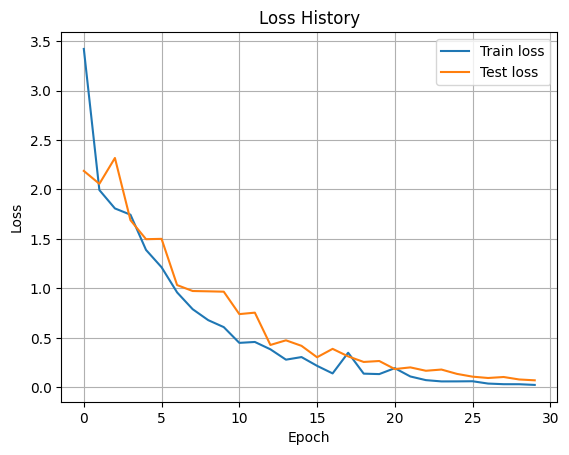

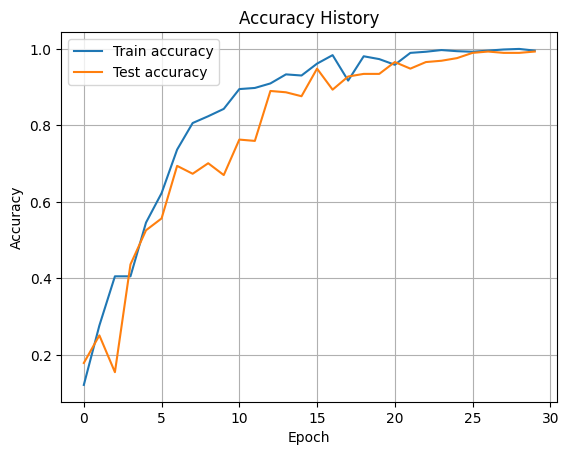

In [7]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy History')
plt.legend()
plt.grid(True)
plt.show()

# Question 7

## Create CNN

In [8]:
cnn = keras.Sequential([
    keras.layers.Input(shape=input_size),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu', use_bias=True),
    keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

The CNN input accepts images of size (64, 64, 3). The first hidden layer that is applied is a convolutional layer with 32 filters, with the ReLU ectivation function, where each filter has a kernel with a size of 3 x 3, meaning it does not examine the whole image at once but in a 3 x 3 area moving from left to right and top to bottom. Additionally, strides = 2 is defined so that the filter moves 2 pixels at a time. In this way, a reduction in the image dimensions is achieved.

In the subsequent hidden layer, dropout is performed with a rate of 0.2, which in practice, during training, randomly deactivates 20% of the neurons, thus achieving a reduction in overfitting, as the model is forced to not depend on specific ones.

Following, another convolution hidden layer is applied with the same number of filters and kernel size, as well as activation function, with the only difference being the stride value being changed to 1, so the dimensions of the features are preserved.

In the next layer, the flatten function is used to convert he features into a one-dimensional vector, and after that a layer with 128 neurons and ReLU as the activation function is appled.

The final layer consists of a number of neurons equal to that of the classes, that is the 10 dog breeds in this specific application, and it uses the softmax activation function, which converts the outputs into probabilities that sum to 1.

## CNN Training

In [9]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.1540 - loss: 2.4585 - val_accuracy: 0.4536 - val_loss: 2.0278
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4718 - loss: 1.7540 - val_accuracy: 0.6323 - val_loss: 1.3047
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7855 - loss: 0.8165 - val_accuracy: 0.8557 - val_loss: 0.5497
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9095 - loss: 0.3008 - val_accuracy: 0.9691 - val_loss: 0.2346
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9891 - loss: 0.0856 - val_accuracy: 0.9897 - val_loss: 0.1129
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9997 - loss: 0.0304 - val_accuracy: 0.9794 - val_loss: 0.1039
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.9897 - val_loss: 0.0873
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9897 - val_los

## Loss and accuracy history for train and test data

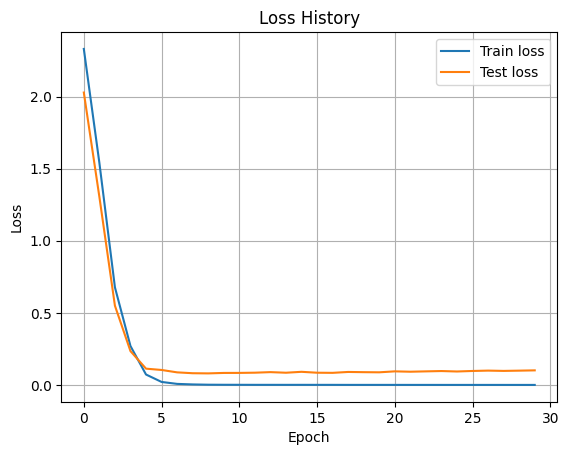

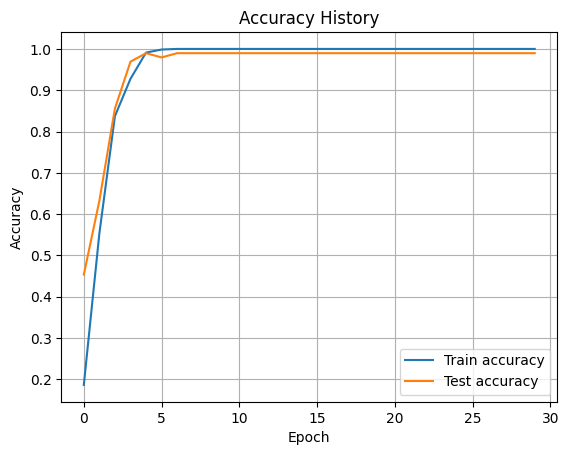

In [10]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy History')
plt.legend()
plt.grid(True)
plt.show()

The CNN model is superior to the MLP one, as unlike MLP, which treats every image as a simple vector with independent pixels, CNN uses convolution, resulting in the image being analyzed in small groups of neighbouring pixels, thus allowing the model to detect various shapes and patterns that might exist and keeping the spatial relationships between pixels. Moreover, by using dropout, the model reduces overfitting, as it tries to not rely on a specific neural path, something which can occur with MLP.

According to the plots, CNN achieves steadier error reduction on the test set, while also achieving high accuracy from very early epochs, thus showing its ability to recognize the correct features faster than MLP.

Concluding, by examining all the previous information, the CNN architecture is superior to that of MLP for image analysis.

# Question 8

## Create Improved CNN

As the CNN already achieves extremely high accuracy from early epochs not much needs to be done in order to improve its ability to predicts. What can be done in order to improve it is training speed reduction, by lowering the number of epochs to around 10, as can be seen from the plots, as well as the reduction of neurons and filters in the convolution layers, thus making the model much quicker.

In [60]:
improved_cnn = keras.Sequential([
    keras.layers.Input(shape=input_size),
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', use_bias=True),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu', use_bias=True),
    keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='improved_CNN')
improved_cnn.summary()

Model: "improved_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 29, 29, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │       861,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 867,418 (3.31 MB)

 Trainable params: 867,418 (3.31 MB)

 Non-trainable params: 0 (0.00 B)

## Improved CNN Training

In [61]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
improved_cnn.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

epochs= 10

history = improved_cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.1209 - loss: 2.3594 - val_accuracy: 0.3505 - val_loss: 2.2156
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3668 - loss: 2.0722 - val_accuracy: 0.3471 - val_loss: 1.9743
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5605 - loss: 1.5019 - val_accuracy: 0.5979 - val_loss: 1.1590
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8168 - loss: 0.6913 - val_accuracy: 0.7423 - val_loss: 0.7375
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9129 - loss: 0.3647 - val_accuracy: 0.9485 - val_loss: 0.2435
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9800 - loss: 0.1204 - val_accuracy: 0.9794 - val_loss: 0.1695
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9914 - loss: 0.0806 - val_accuracy: 0.9897 - val_loss: 0.1117
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9985 - loss: 0.0322 - val_accuracy: 0.9897 - val_los

## Loss and accuracy history for train and test data

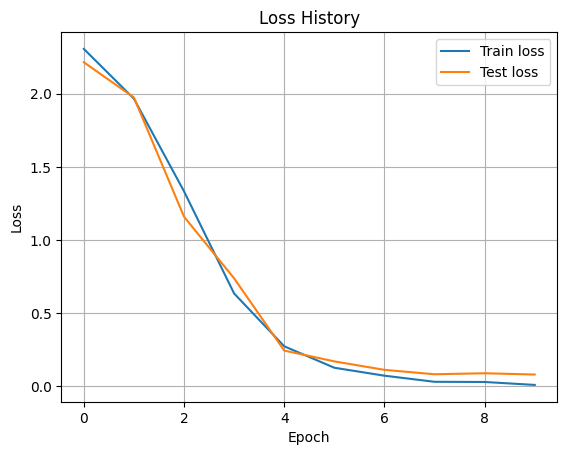

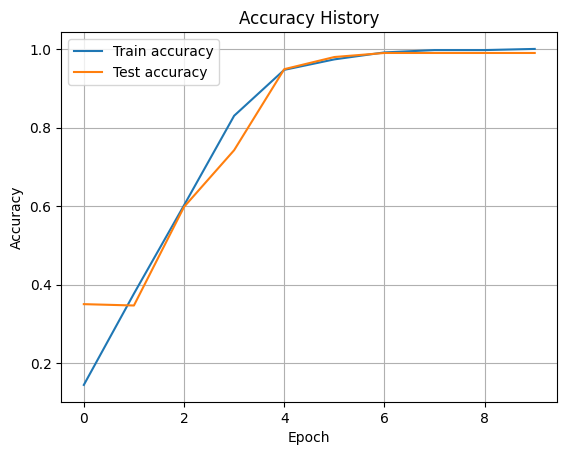

In [62]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy History')
plt.legend()
plt.grid(True)
plt.show()

By examining the plots, it is evident that the accuracy remains at extremely high levels, with the train accuracy being 1 and the test accuracy around 0.99, which proves that simplifying the architecture did not influence the ability of the model to predict. Therefore, CNN was improved by lowering the time needed for executions, by lowering the number of epochs needed, as well as, by lowering the amount of neurons and filters that are used, making it more efficient and less resource hungry.